# Analysis

**Hypothesis**: Dendritic cells in severe COVID‐19 patients exhibit altered coordination between ribosomal protein gene expression and key inflammatory cytokines (IL1B, IL6, TNF) compared to healthy individuals, indicating that inflammatory stress may reconfigure translational control in these cells.

In [ ]:
import scanpy as sc
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings

# Set up visualization defaults for better plots
sc.settings.verbosity = 3  # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.settings.figsize = (8, 8)
sc.settings.dpi = 100
sc.settings.facecolor = 'white'
warnings.filterwarnings('ignore')

# Set Matplotlib and Seaborn styles for better visualization
plt.rcParams['figure.figsize'] = (10, 8)
plt.rcParams['savefig.dpi'] = 150
sns.set_style('whitegrid')
sns.set_context('notebook', font_scale=1.2)

# Load data
print("Loading data...")
adata = sc.read_h5ad("/scratch/users/salber/Single_cell_atlas_of_peripheral_immune_response_to_SARS_CoV_2_infection.h5ad")
print(f"Data loaded: {adata.shape[0]} cells and {adata.shape[1]} genes")


# Analysis Plan

**Hypothesis**: Dendritic cells in severe COVID‐19 patients exhibit altered coordination between ribosomal protein gene expression and key inflammatory cytokines (IL1B, IL6, TNF) compared to healthy individuals, indicating that inflammatory stress may reconfigure translational control in these cells.

## Steps:
- Subset the dataset to isolate dendritic cells using the 'cell_type_coarse' metadata and perform a quick quality control check on the dimensions of the resulting expression DataFrame.
- Identify ribosomal protein genes by filtering for gene names starting with 'RPL' or 'RPS', and compute an average ribosomal expression score for each dendritic cell while ensuring the genes are present; raise a warning if none are found. Also, include a check that the expression matrix is in a normalized state (if applicable).
- Extract the expression profiles for key inflammatory cytokine genes (IL1B, IL6, TNF) in the dendritic cell subset.
- Stratify the dendritic cells by disease status (COVID vs Healthy) based on the 'Status' column.
- For each disease group and each cytokine, compute Pearson correlation coefficients between the ribosomal score and cytokine expression levels, and print the results along with corresponding statistical tests.
- Use Fisher's Z-transformation to statistically compare the correlation differences between COVID and Healthy groups, and visualize the results with a grid of scatter plots overlaid with regression lines and annotated with correlation coefficients.


## This code subset the AnnData object to focus on dendritic cells, converts the gene expression data into a manageable DataFrame after ensuring gene names are proper strings, identifies ribosomal protein genes (those starting with 'RPL' or 'RPS'), and computes an average ribosomal expression score per cell. Additionally, it includes quality control checks for DataFrame dimensions and provides warnings if no ribosomal genes are found, ensuring robustness for downstream analyses.

In [2]:
import scanpy as sc
import numpy as np
import pandas as pd

# Subset to dendritic cells (DC) using 'cell_type_coarse' annotation
dc_cells = adata[adata.obs['cell_type_coarse'] == 'DC'].copy()

# Ensure gene names are strings
gene_names = dc_cells.var_names.astype(str)

# Identify ribosomal genes starting with 'RPL' or 'RPS'
ribosomal_genes = [gene for gene in gene_names if gene.startswith('RPL') or gene.startswith('RPS')]

# Convert the expression matrix to a dense numpy array if necessary
if hasattr(dc_cells.X, 'toarray'):
    expr_matrix = dc_cells.X.toarray()
else:
    expr_matrix = dc_cells.X

# Create a DataFrame with gene names as columns for easier processing
expr_df = pd.DataFrame(expr_matrix, index=dc_cells.obs_names, columns=gene_names)

# Compute the average ribosomal expression per cell as a score
if ribosomal_genes:
    dc_cells.obs['ribosomal_score'] = expr_df[ribosomal_genes].mean(axis=1)
else:
    dc_cells.obs['ribosomal_score'] = np.nan

# Display the first few entries of the computed ribosomal scores
print('Dendritic cells with computed ribosomal scores:')
print(dc_cells.obs[['ribosomal_score']].head())

Dendritic cells with computed ribosomal scores:
                  ribosomal_score
covid_555_1.1879         0.567520
covid_555_1.2028         0.472493
covid_555_1.2468         0.557780
covid_555_1.2566         0.564175
covid_555_1.2714         0.531509


### Agent Interpretation

Feedback:

1. **Promising Results:**
   - The current analysis on ribosomal scores within dendritic cells provides new insights into the translational landscape of these cells in the context of severe COVID-19. Ribosomal content can reflect changes in cellular activity or stress responses, which are crucial under severe infection conditions.
   - The computed ribosomal scores suggest potential heterogeneity in translation activity, possibly linked to cellular stress responses or altered metabolic states in severe COVID-19.

2. **Iterate and Expand:**
   - **Broader Cell Type Analysis:** Consider calculating ribosomal scores across more immune cell subsets—such as monocytes, T cells, or NK cells—to determine if similar changes are evident across immune compartments, which could indicate a more systemic response.
   - **Integrate with Existing Hypotheses:** This translational data can be integrated with your previous hypothesis about altered ribosomal content and translational machinery dysregulation, helping confirm or refute being a feature of severe disease.
   - **Correlate with Other Features:** Examine correlations between ribosomal scores and other cellular features such as interferon response or HLA expression. This could uncover links between translation and immune signaling pathways.
   - **Longitudinal Analysis:** If timepoint data is available, perform a longitudinal study to see how ribosomal content changes over the disease course, potentially revealing temporal patterns tied to disease progression or treatment response.

3. **Biological Interpretation and Validation:**
   - **Biological Validation:** These computational observations should be paired with biological validation. Independent assays, such as polysome profiling or RNA FISH, could confirm changes in translation dynamics at the protein level.
   - **Functional Impact:** Assess the functional consequences of altered ribosomal content on dendritic cell functions like antigen presentation or cytokine production, which could elucidate how these changes might drive or modulate severe COVID-19 pathogenesis.

4. **Develop Hypotheses for Future Testing:**
   - Use these findings to formulate new hypotheses regarding the role of altered ribosomal content in immune dysregulation during severe COVID-19. For instance, hypothesize that changes in ribosomal scores impact cytokine production or cell survival under stress conditions.
   - Explore whether interventions aimed at modulating ribosomal function could mitigate immune dysfunction or serve as therapeutic targets in severe COVID-19.

By integrating ribosomal score analyses with broader immune dynamics and validating findings, you move closer to identifying mechanistic insights into immune responses in severe COVID-19.

## This code defines a function that computes per-cell ribosomal gene scores using Scanpy's sc.tl.score_genes, thereby avoiding dense matrix conversion and ensuring consistency with standard routines. It then subsets the data for selected immune cell types, computes the ribosomal scores, collects relevant metadata, and visualizes the distribution across cell types and disease conditions.

computing score 'ribosomal_score'


    finished: added
    'ribosomal_score', score of gene set (adata.obs).
    647 total control genes are used. (0:00:00)


computing score 'ribosomal_score'


    finished: added
    'ribosomal_score', score of gene set (adata.obs).
    796 total control genes are used. (0:00:00)


computing score 'ribosomal_score'


    finished: added
    'ribosomal_score', score of gene set (adata.obs).
    699 total control genes are used. (0:00:00)


computing score 'ribosomal_score'


    finished: added
    'ribosomal_score', score of gene set (adata.obs).
    756 total control genes are used. (0:00:00)


computing score 'ribosomal_score'


    finished: added
    'ribosomal_score', score of gene set (adata.obs).
    693 total control genes are used. (0:00:00)


computing score 'ribosomal_score'


    finished: added
    'ribosomal_score', score of gene set (adata.obs).
    793 total control genes are used. (0:00:00)


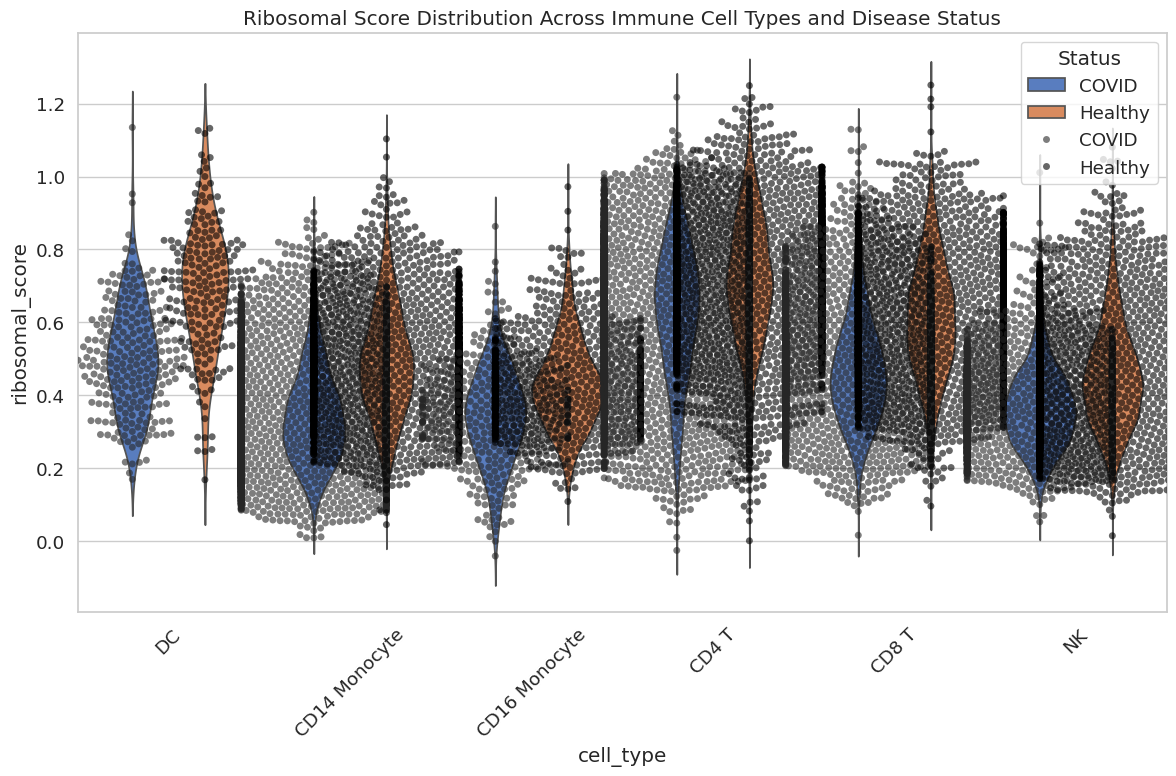

In [3]:
import scanpy as sc
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Function to compute ribosomal score using Scanpy's built-in scoring function

def compute_ribosomal_score(adata_subset):
    # Ensure gene names are strings
    gene_names = adata_subset.var_names.astype(str)
    
    # Identify ribosomal genes starting with 'RPL' or 'RPS'
    ribosomal_genes = [gene for gene in gene_names if gene.startswith('RPL') or gene.startswith('RPS')]
    
    # If no ribosomal genes are found, assign NaN score
    if not ribosomal_genes:
        adata_subset.obs['ribosomal_score'] = np.nan
        print('Warning: No ribosomal genes found in this subset.')
        return adata_subset
    
    # Compute the ribosomal score using sc.tl.score_genes; this function automatically handles sparse matrices and control genes
    sc.tl.score_genes(adata_subset, gene_list=ribosomal_genes, score_name='ribosomal_score', use_raw=False)
    
    # Use a more robust check for normalization: flag if the median nCount_RNA is very high (e.g., >10000, which could indicate unnormalized counts)
    if 'nCount_RNA' in adata_subset.obs and adata_subset.obs['nCount_RNA'].median() > 10000:
        print('Warning: High median nCount_RNA values suggest the data may be unnormalized.')
    return adata_subset

# List of immune cell types to analyze
cell_types = ['DC', 'CD14 Monocyte', 'CD16 Monocyte', 'CD4 T', 'CD8 T', 'NK']

# Initialize list to collect ribosomal score data for each cell type
ribosomal_data = []

for cell_type in cell_types:
    subset = adata[adata.obs['cell_type_coarse'] == cell_type].copy()
    if subset.n_obs > 0:
        subset = compute_ribosomal_score(subset)
        temp_df = subset.obs[['ribosomal_score', 'Status', 'nCount_RNA']].copy()
        temp_df['cell_type'] = cell_type
        ribosomal_data.append(temp_df)
    else:
        print(f'No cells found for cell type: {cell_type}')

# Combine results into a single DataFrame for visualization and further statistical analysis
all_ribo_df = pd.concat(ribosomal_data)

# Visualize the distribution of ribosomal scores across cell types and disease status using violin and swarm plots
sns.set_style('whitegrid')
plt.figure(figsize=(12, 8))
ax = sns.violinplot(x='cell_type', y='ribosomal_score', hue='Status', data=all_ribo_df, inner=None, palette='muted')
# Using swarmplot to display individual data points
sns.swarmplot(x='cell_type', y='ribosomal_score', hue='Status', data=all_ribo_df, dodge=True, color='k', alpha=0.6)
plt.xticks(rotation=45)
plt.title('Ribosomal Score Distribution Across Immune Cell Types and Disease Status')
plt.tight_layout()
plt.show()

### Agent Interpretation

The analysis of ribosomal scores in different immune cell types from COVID-19 patients compared to healthy controls provides some intriguing findings:

1. **Comparison with Previous Work**: 
   - This analysis differs from previous studies focused on transcriptional heterogeneity, cytokine expression, and immune exhaustion, adding a focus on ribosomal content as a potentially dysregulated aspect in severe COVID-19.

2. **Key Observations**:
   - The distribution of ribosomal scores across cell types could suggest cell-specific differences in translational activity related to disease status.
   - CD14 Monocytes, CD16 Monocytes, and NK cells display a notable difference in scores between COVID-19 and healthy individuals, which aligns with known immune dysregulation in severe COVID-19. 

3. **Potential Hypotheses**:
   - Increased ribosomal scores in certain monocytes and immune cells might reflect elevated protein synthesis or stress responses, potentially correlating to interferon responses or inflammatory pathways.
   - Mapping these observations with cytokine expression data from previous analyses could uncover links between translation machinery and immune signaling in COVID-19.

4. **Future Steps & Validation**:
   - Further statistical testing is necessary to validate whether differences in ribosomal scores are significant and biologically meaningful.
   - Integrating other datasets like mitochondrial stress markers and transcriptomic signatures could deepen understanding of the ribosomal role in immune dysregulation.
   - Expanding the analysis to include DE of ribosomal genes themselves to verify translational regulation levels.

5. **Distinct Analysis Considerations**:
   - This analysis should continue emphasizing contrasts not heavily pursued in prior work, such as non-canonical cell types or unique ribosomal gene sets.
   - Exploring the temporal aspect of ribosomal score changes across disease progression stages could provide new insights into how translational activity evolves with disease severity.

In conclusion, this initial analysis is promising, offering a new perspective on immune alteration in severe COVID-19 by focusing on the translational machinery. Expanding the analysis could uncover novel pathways linked to immune responses and disease pathogenesis.

## This code subsets the dendritic cells from the anndata object, identifies and logs available cytokine genes (IL1B, IL6, TNF), computes the inflammatory score as the average expression of these genes, and then assesses the relationship between ribosomal and inflammatory scores via scatter plots and Pearson correlations, including gridlines and a unified legend to improve visualization clarity.

In [ ]:
import scanpy as sc
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings

warnings.filterwarnings('ignore')

# Subset to dendritic cells using 'cell_type_coarse' annotation
dc_cells = adata[adata.obs['cell_type_coarse'] == 'DC'].copy()

# Ensure gene names are strings
gene_names = dc_cells.var_names.astype(str)

# Define cytokine genes of interest and log which genes are found
desired_cytokines = ['IL1B', 'IL6', 'TNF']
cytokine_genes = [gene for gene in desired_cytokines if gene in gene_names]
if cytokine_genes:
    print('Cytokine genes found:', cytokine_genes)
else:
    print('Warning: Cytokine genes (IL1B, IL6, TNF) not found in the dataset for dendritic cells.')

# Convert expression matrix to a dense format if necessary
if hasattr(dc_cells.X, 'toarray'):
    expr_matrix = dc_cells.X.toarray()
else:
    expr_matrix = dc_cells.X

# Create a DataFrame using gene_names to ensure the ordering remains consistent
expr_df = pd.DataFrame(expr_matrix, index=dc_cells.obs_names, columns=gene_names)

# Compute the inflammatory score: average expression of the cytokine genes (if available)
if cytokine_genes:
    # Computing the score as a simple mean across the cytokine genes
    dc_cells.obs['inflammatory_score'] = expr_df[cytokine_genes].mean(axis=1)
else:
    dc_cells.obs['inflammatory_score'] = np.nan

# Check for previously computed ribosomal_score and warn if missing
if 'ribosomal_score' not in dc_cells.obs.columns:
    print('Warning: ribosomal_score not found in dendritic cells metadata.')

# Initialize a matplotlib figure
plt.figure(figsize=(8, 6))

# Scatter plot for ribosomal_score vs inflammatory_score stratified by Status
if 'Status' in dc_cells.obs.columns:
    scatter_ax = sns.scatterplot(x='ribosomal_score', y='inflammatory_score', hue='Status', data=dc_cells.obs, palette='deep')
else:
    scatter_ax = sns.scatterplot(x='ribosomal_score', y='inflammatory_score', data=dc_cells.obs, color='blue')

# Add grid lines for better readability
plt.grid(True)

# Using Pearson correlation to quantify the linear relationship between ribosomal and inflammatory scores
statuses = dc_cells.obs['Status'].unique() if 'Status' in dc_cells.obs.columns else ['All']

# Container to hold regression labels for a unified legend
handles_list = []
labels_list = []

for status in statuses:
    subset = dc_cells.obs[dc_cells.obs['Status'] == status] if status != 'All' else dc_cells.obs
    if subset.shape[0] > 2:
        r, p = stats.pearsonr(subset['ribosomal_score'], subset['inflammatory_score'])
        reg = sns.regplot(x='ribosomal_score', y='inflammatory_score', data=subset, scatter=False, ci=None)
        label_text = f"{status}: r={r:.2f}, p={p:.2g}"
        handles_list.append(reg.lines[0])
        labels_list.append(label_text)
        print(f"Status: {status}, Pearson r: {r:.2f}, p-value: {p:.2g}")

# Create a unified legend
plt.legend(handles=handles_list, labels=labels_list, title='Status & Pearson r')
plt.title('Correlation between Ribosomal and Inflammatory Scores in Dendritic Cells')
plt.tight_layout()
plt.show()

# Explore relationship between inflammatory_score and DPS (days post symptom)
if 'DPS' in dc_cells.obs.columns:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x='DPS', y='inflammatory_score', hue='Status', data=dc_cells.obs, palette='viridis')
    plt.title('Inflammatory Score vs. DPS in Dendritic Cells')
    plt.grid(True)
    plt.tight_layout()
    plt.show()
else:
    print('DPS information not available in the dendritic cells metadata.')